#                      **IPL Data analsis and visualiation**


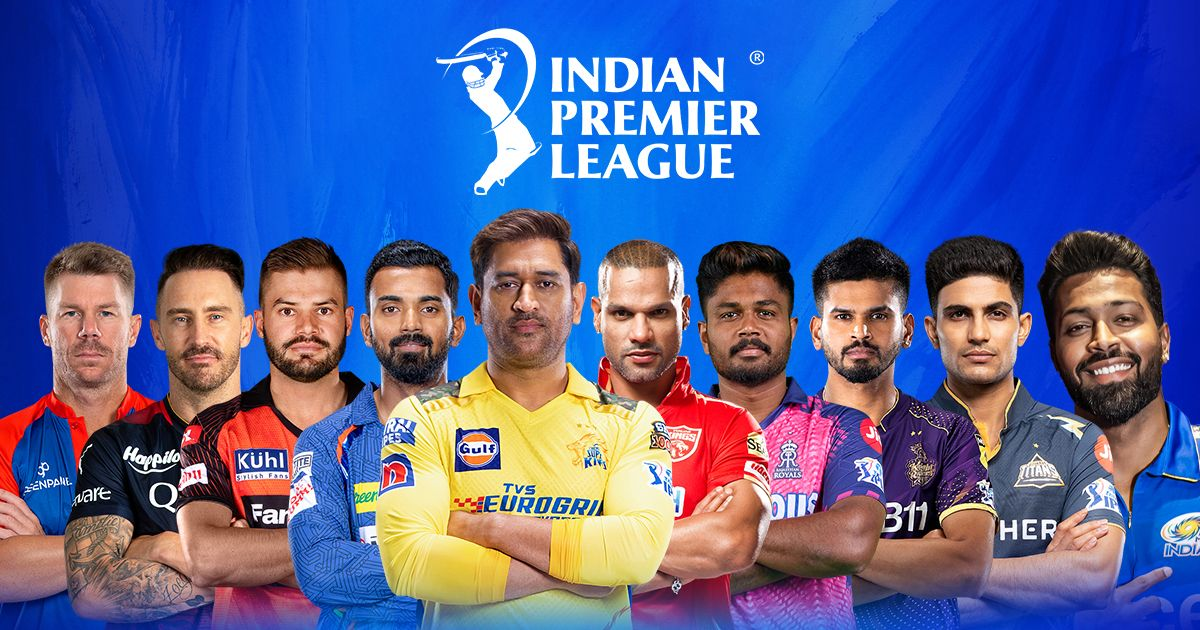

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
deliveries_data = pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')
match_data = pd.read_csv('/content/IPL Matches 2008-2020.csv')
print("Data ready for exploration")

Data ready for exploration


In [ ]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
match_data.isnull().sum()


id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
match_data.shape

(816, 17)

In [ ]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
print('Total Matches Played:',match_data.shape[0])
print(' \n Venues Played At:',match_data['city'].unique())
print(' \n Teams :',match_data['team1'].unique())

Total Matches Played: 816
 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']
 
 Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


## **Handling Missing Value**
df.city.unique()
df[df.city.isna()]
# since there are missing value from dubai and middle east venue.so we try to replace those city names
df['city'] = df['city'].where(df['venue'] != 'Dubai International Cricket Stadium', 'Dubai')
df['city'] = df['city'].where(df['venue'] != 'Sharjah Cricket Stadium', 'Sharjah')

df.drop([241,486,511,744],inplace=True)

In [ ]:
match_data.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


In [ ]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
match_data.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [ ]:
match_data[match_data.city.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [ ]:
# since there are missing value from dubai and middle east venue.so we try to replace those city names
match_data['city'] = match_data['city'].where(match_data['venue'] != 'Dubai International Cricket Stadium', 'Dubai')
match_data['city'] = match_data['city'].where(match_data['venue'] != 'Sharjah Cricket Stadium', 'Sharjah')

In [ ]:
match_data.city.isnull().sum()

0

In [ ]:
match_data.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
match_data.drop([241,486,511,744],inplace=True)  #  drop here player of the match i null

In [ ]:
match_data.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
dtype: int64

In [ ]:
match_data[match_data['result_margin'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [ ]:
match_data['result_margin'].fillna(0,inplace=True)

In [ ]:
match_data.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin        0
eliminator           0
method             793
umpire1              0
umpire2              0
dtype: int64

In [ ]:
match_data.method.unique()

array([nan, 'D/L'], dtype=object)

In [ ]:
match_data[match_data['method'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.0,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [ ]:
match_data['method'].fillna('regular',inplace=True)

In [ ]:
match_data.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
print(match_data.team1.unique())
print(match_data.team2.unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals']


In [ ]:
# replacing the observed discrepecny repeated value
match_data.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)

In [ ]:
print(match_data.team1.unique())
print(match_data.team2.unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Delhi Capitals']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Delhi Capitals']


## **Analysis**

***1) Number of matches played in various seasons :***

In [ ]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen,2008


In [ ]:

match_per_season= match_data.groupby('Season')['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,72
4,2012,74
5,2013,76
6,2014,60
7,2015,57
8,2016,60
9,2017,59


In [ ]:
colors = ['turquoise',] * 13
colors[5] = 'crimson'

fig=px.bar(data_frame=match_per_season,x=match_per_season.Season,y=match_per_season.matches,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="Number of matches played in different seasons ",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Each season, almost 60 matches were played. However, we see a spike in the number of matches from 2011 to 2013. This is because two new franchises, the Pune Warriors and Kochi Tuskers Kerala, were introduced, increasing the number of teams to 10.

# 2) Total number of runs scored across seasons :

In [ ]:
match_data.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen,2008


In [ ]:
season_data=match_data[['id','Season']].merge(deliveries_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
p = season_data.groupby('Season')['total_runs'].sum().reset_index()
season = p
p

,Season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21098
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,17943
8,2016,18862
9,2017,18769


In [ ]:
fig = px.line(p,x='Season',y='total_runs')
fig.update_layout(title="Total Runs Across the Seasons ",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

Season 2013 was the highest scoring season (22,541 runs), followed by 2012 (22,453 runs)
Season 2009 was the lowest scoring season (16,320 runs)

In [ ]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season.style.background_gradient(cmap='PuBu',subset=['Runs scored per match'])

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,72,21098,293.027778
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,57,17943,314.789474
2016,60,18862,314.366667


In [ ]:
season

,Season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21098
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,17943
8,2016,18862
9,2017,18769


***3) Runs scored per match across seasons :***

In [ ]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.style.background_gradient(cmap='PuBu',subset=['Runs scored per match'])


,Season,matches,total_runs,Runs scored per match
0,2008,58,17937,309.258621
1,2009,57,16320,286.315789
2,2010,60,18864,314.400000
3,2011,72,21098,293.027778
4,2012,74,22453,303.418919
5,2013,76,22541,296.592105
6,2014,60,18909,315.150000
7,2015,57,17943,314.789474
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


In [ ]:
fig = px.line(runs_per_season, x=runs_per_season.Season, y="Runs scored per match")
fig.update_layout(title="Runs scored per match across seasons",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

In season 2018, runs scored per match was 331.683333 which was highest among others.
In season 2009, runs scored per match was 286.315789 which was lowest till now

***4) Count of matches by umpires***

In [ ]:
ump = pd.concat([match_data['umpire1'],match_data['umpire2']])
ump= ump.value_counts()
umps=ump.to_frame().reset_index()
ump.head(10)

S Ravi             121
HDPK Dharmasena     93
AK Chaudhary        87
C Shamshuddin       82
M Erasmus           65
CK Nandan           57
Nitin Menon         57
SJA Taufel          55
Asad Rauf           51
VA Kulkarni         50
dtype: int64

S Ravi has umpired in 121 matches, followed by Dharmasena who has umpired in 94 matches

***5) Number of tosses won by teams :***

In [ ]:
match_data['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     86
Rajasthan Royals                85
Kings XI Punjab                 85
Delhi Daredevils                79
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64

In [ ]:
toss=match_data['toss_winner'].value_counts()
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar( y=toss,x=toss.index,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="No. of tosses won by each team",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Mumbai Indians have won the most tosses, followed by Kolkata Knight Riders.

***6) Decision made after winning the toss***

In [ ]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,regular,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,regular,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,regular,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,regular,BF Bowden,K Hariharan,2008


<Axes: title={'center': 'Toss decision percentage'}, ylabel='toss_decision'>

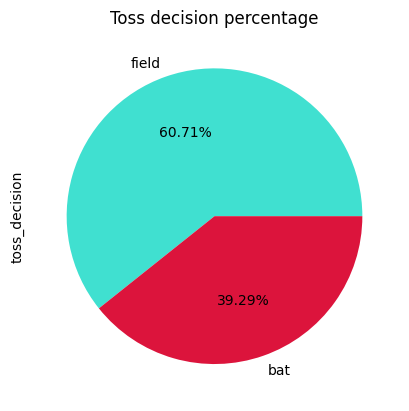

In [ ]:
colors = ['turquoise', 'crimson']
(match_data['toss_decision'].value_counts()).plot(kind='pie',autopct='%0.2f%%',colors = ['turquoise', 'crimson'],title="Toss decision percentage",)


After winning the toss, team tends to field first

***7) Toss decision across seasons :***

In [ ]:
fig=px.histogram(data_frame=match_data,x='Season',color='toss_decision',color_discrete_sequence=colors,barmode='group')
fig.update_layout(title='Toss decision in different seasons',titlefont={'size': 26},
                  template='simple_white')
fig.update_traces(marker_line_color='black',marker_line_width=2.5,opacity=1)
fig.show()

Most of the times, teams decide to feild first except in season 2009,2010,2013 where teams decided to bat first mostly.
Since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for more than 80% of the times except in season 2020.

***8)Winning toss implies winning game ?***

In [ ]:
match_data['toss_win_game_win'] = np.where((match_data.toss_winner == match_data.winner),'Yes','No')
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,regular,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,regular,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,regular,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,regular,BF Bowden,K Hariharan,2008,No


<Axes: title={'center': 'Winning toss implies winning macthes?'}, ylabel='toss_win_game_win'>

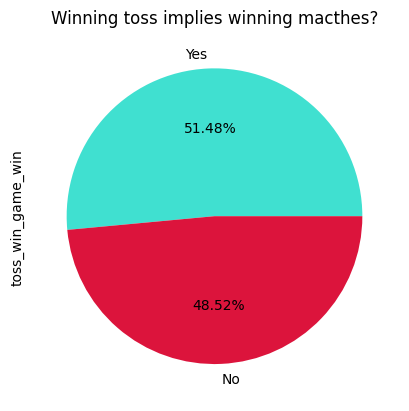

In [ ]:
(match_data['toss_win_game_win'].value_counts()).plot(kind='pie',autopct='%0.2f%%',colors = ['turquoise', 'crimson'],title="Winning toss implies winning macthes?",)


Though winning toss gives you an advantage but it doesn't significantly implies that winning the toss helps in winning the game.

***9) Match win result:***

In [ ]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

We can see that 435 out of 816 matches was won by team batting second while 364 matches was won by team batting first.

***10 ) Number of times team have won the tournament***

In [ ]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win_game_win'],
      dtype='object')

In [ ]:
win_counts = match_data['winner'].value_counts()

# Print the number of times each team has won the tournament
print("Number of times each team has won the tournament:")
print(win_counts)

Number of times each team has won the tournament:
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


In [ ]:
import pandas as pd

winning_teams = match_data[['Season','winner']]


#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.Season.unique()):
  winners_team[i] = winning_teams[winning_teams.Season==i]['winner'].tail(1).values[0]

winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL,columns=['team'])


winners_of_IPL

,team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


In [ ]:
winners_of_IPL.value_counts()

team                 
Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
dtype: int64

In [ ]:
colors = ['turquoise',] * 6
colors[0] = 'crimson'
fig=px.bar( y=winners_of_IPL.value_counts(),x=winners_of_IPL['team'].value_counts().index,labels=dict(x="Team",y="Count"),)
fig.update_layout(title="Number of times each team has won the tournament",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)

 Mumbai Indians had won the IPL 5 times while Chennai Super Kings had won it 3 times.

***11) Total number of matches played by a team :***


In [ ]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,regular,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,regular,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,regular,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,regular,BF Bowden,K Hariharan,2008,No


In [ ]:
matches_played_byteams=pd.concat([match_data['team1'],match_data['team2']],axis=0)
teams= matches_played_byteams.value_counts().reset_index()
teams.columns=['Team Name','Total Matches played']
teams.style.background_gradient(cmap='PuBu',subset=['Total Matches played'])

,Team Name,Total Matches played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,192
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,159
6,Rajasthan Royals,159
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,45


In [ ]:
colors = ['turquoise',] * 14
colors[0] = 'crimson'
fig=px.bar(y=teams['Total Matches played'],x=teams['Team Name'],labels=dict(x="Team",y="Count"),)
fig.update_layout(title="Total number of matches played",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)

 Mumbai Indians have played the most matches(203), followed by Royal Challengers Bangalore (192)

***12) Most number of wins :***

In [ ]:
wins=pd.DataFrame(match_data['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [ ]:
colors = ['turquoise'] * 14
colors[0] = 'crimson'
fig=px.bar(y=wins['Wins'],x=wins['Team Name'],labels=dict(x="Team",y="Count"),)
fig.update_layout(title="Total number of matches Wins ",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)

Mumbai Indians had won the most matches(120), followed by Chennai Super Kings (106)

***13 )Win % by teams***

In [ ]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played=played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1)
played.style.background_gradient(cmap='PuBu',subset=['% Win'])


,Team Name,Total Matches played,Wins,% Win
0,Chennai Super Kings,178,106,59.550562
1,Mumbai Indians,203,120,59.113300
2,Delhi Capitals,33,19,57.575758
3,Sunrisers Hyderabad,124,66,53.225806
4,Kolkata Knight Riders,192,99,51.562500
5,Rajasthan Royals,159,81,50.943396
6,Rising Pune Supergiants,30,15,50.000000
7,Royal Challengers Bangalore,192,91,47.395833
8,Kings XI Punjab,190,88,46.315789
9,Gujarat Lions,30,13,43.333333


In [ ]:
colors = ['turquoise',] * 14
colors[0] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['% Win'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win % by teams",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 Chennai Super kings have the highest win % of 59.550, followed by Mumbai Indian and Delhi capital.

***14) Lucky Venues for a team :***

In [ ]:
def lucky(match_data,team_name):
    return match_data[match_data['winner']==team_name]['venue'].value_counts().nlargest(10)

<Axes: title={'center': 'Wins at different Venues for MI:'}, ylabel='venue'>

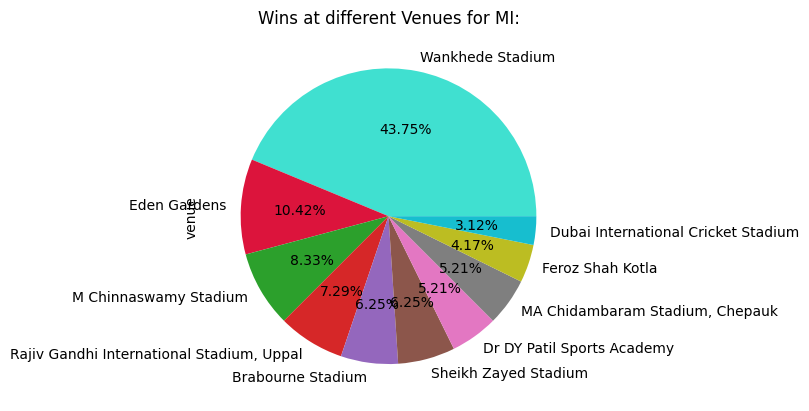

In [ ]:
# for mumbai Indian
mi = lucky(match_data,'Mumbai Indians')
# Define colors for the pie chart
colors = ['#40E0D0','#DC143C', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

mi.plot(kind='pie',autopct='%0.2f%%',title='Wins at different Venues for MI:',colors=colors)# for mumbai Indian


<Axes: title={'center': 'Wins at different Venues for RCB:'}, ylabel='venue'>

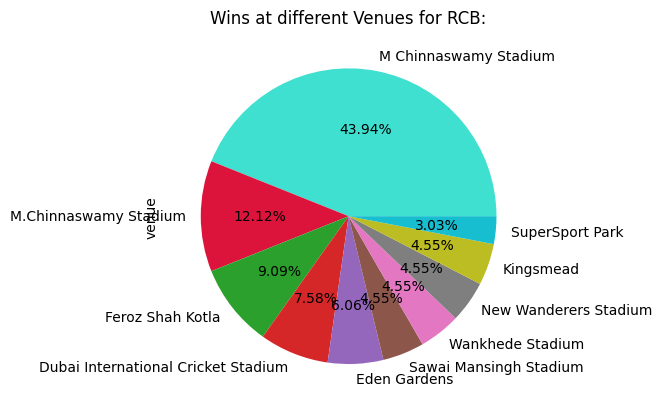

In [ ]:
rcb=lucky(match_data,'Royal Challengers Bangalore')
# Define colors for the pie chart
colors = ['#40E0D0','#DC143C', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

rcb.plot(kind='pie',autopct='%0.2f%%',title='Wins at different Venues for RCB:',colors=colors)


<Axes: title={'center': 'Wins at different Venues for CSK:'}, ylabel='venue'>

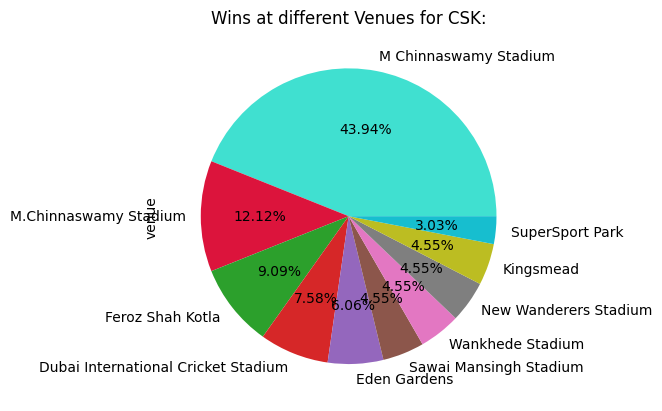

In [ ]:
csk=lucky(match_data,'Chennai Super Kings')
# Define colors for the pie chart
colors = ['#40E0D0','#DC143C', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

rcb.plot(kind='pie',autopct='%0.2f%%',title='Wins at different Venues for CSK:',colors=colors)


<Axes: title={'center': 'Wins at different Venues for KKR:'}, ylabel='venue'>

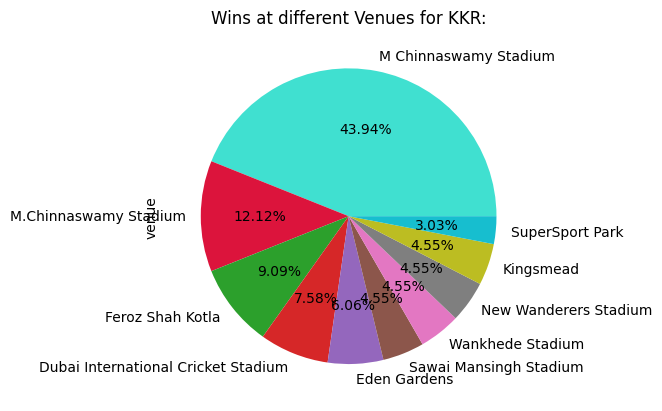

In [ ]:
kkr=lucky(match_data,'Kolkata Knight Riders')
# Define colors for the pie chart
colors = ['#40E0D0','#DC143C', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

rcb.plot(kind='pie',autopct='%0.2f%%',title='Wins at different Venues for KKR:',colors=colors)


It is easily evident that team have won the most of its matches at their home venues.

***15) Comparision between two teams :***

In [ ]:
def comparison(team1,team2):
    compare=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))&((match_data['team1']==team2)|(match_data['team2']==team2))]
    fig=px.histogram(data_frame=compare,x='Season',color='winner',labels=dict(x="Team Name",y="Count"),barmode='group',nbins=16,color_discrete_sequence=colors,)
    fig.update_layout(title="Team Comparision:",
                      titlefont={'size': 26},template='simple_white'
                      )
    fig.update_traces(marker_line_color='black',
                      marker_line_width=2.5, opacity=1)
    fig.show()

In [ ]:
comparison('Mumbai Indians','Chennai Super Kings')

Mumbai Indians is slight ahead of Chennai Super Kings in this heavy clash.
The dominance was especially seen in the 2019 season, where Mumbai defeated Chennai 4 out of 4 times they met, including the playoff and final.

In [ ]:
comparison('Sunrisers Hyderabad','Royal Challengers Bangalore')

We can observe that this one is a very tight clash, with most of the times both the teams winning one each.
Sunrisers Hyderabad had an upper hand in 2016 and 2020

***16) Particular batsman analysis :***

Lets see some stats of highest run scorer of IPL : ***Virat Kohli***

In [ ]:
df_kohli=deliveries_data[(deliveries_data['batsman']=='V Kohli')]
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [ ]:
values = df_kohli['dismissal_kind'].value_counts()
values

caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: dismissal_kind, dtype: int64

<Axes: title={'center': 'dismissal_Type'}, ylabel='dismissal_kind'>

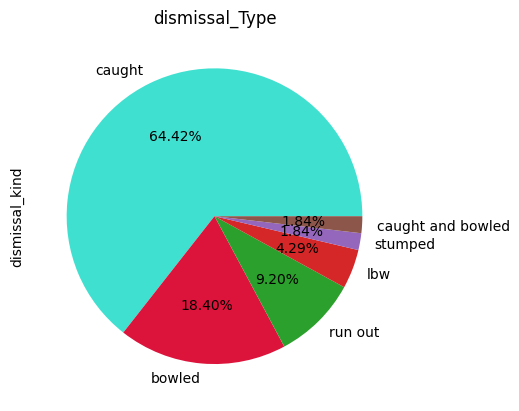

In [ ]:
values.plot(kind='pie',autopct='%0.2f%%',title='dismissal_Type',colors=colors)

In [ ]:
len(df_kohli[df_kohli['batsman_runs']==4])

504

In [ ]:
len(df_kohli[df_kohli['batsman_runs']==6])

202

In [ ]:
df_kohli['total_runs'].sum()

6081

***17) Innings wise comparision :***

In [ ]:
runs=deliveries_data.groupby(['id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,Kolkata Knight Riders,222
1,2,Royal Challengers Bangalore,82
2,1,Chennai Super Kings,240
3,2,Kings XI Punjab,207
4,1,Rajasthan Royals,129
...,...,...,...
1625,2,Sunrisers Hyderabad,132
1626,1,Delhi Capitals,189
1627,2,Sunrisers Hyderabad,172
1628,1,Delhi Capitals,156


In [ ]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

In [ ]:
inning1

,inning,batting_team,total_runs
0,1,Kolkata Knight Riders,222
2,1,Chennai Super Kings,240
4,1,Rajasthan Royals,129
6,1,Mumbai Indians,165
8,1,Deccan Chargers,110
...,...,...,...
1620,1,Royal Challengers Bangalore,201
1622,1,Mumbai Indians,200
1624,1,Royal Challengers Bangalore,131
1626,1,Delhi Capitals,189


In [ ]:
fig = px.box(y='total_runs',x='batting_team',data_frame=inning1,color='batting_team')

fig.update_layout(title="Batting First",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

 Royal Challengers Bangalore and Mumbai Indians median value is better than other teams while batting first.
Royal Challengers Bangalore had scored 250+ in a single match and is the only team to achieve that feat.

In [ ]:
fig = px.box(y='total_runs',x='batting_team',data_frame=inning2,color='batting_team')

fig.update_layout(title="Batting second",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.show()

***18) Scored 200+ runs :***

In [ ]:
high_scores=deliveries_data.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
score_200=high_scores[high_scores['total_runs']>=200]
score_200.head(15)

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
3,335983,2,Kings XI Punjab,Chennai Super Kings,207
14,335989,1,Chennai Super Kings,Mumbai Indians,208
15,335989,2,Mumbai Indians,Chennai Super Kings,202
16,335990,1,Deccan Chargers,Rajasthan Royals,214
17,335990,2,Rajasthan Royals,Deccan Chargers,217
64,336014,1,Kolkata Knight Riders,Deccan Chargers,204
74,336019,1,Kings XI Punjab,Rajasthan Royals,221
100,336033,1,Rajasthan Royals,Chennai Super Kings,211


In [ ]:
p1 = score_200['batting_team'].value_counts().reset_index()
p1.style.background_gradient(cmap='PuBu')

,index,batting_team
0,Royal Challengers Bangalore,18
1,Chennai Super Kings,17
2,Kings XI Punjab,14
3,Mumbai Indians,14
4,Kolkata Knight Riders,12
5,Sunrisers Hyderabad,12
6,Rajasthan Royals,9
7,Delhi Daredevils,5
8,Delhi Capitals,2
9,Deccan Chargers,1


In [ ]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=p1.index,y=p1['batting_team'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total count of 200+ by batting team",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Royal Challengers Bangalore had scored the most 200+ score (18 times), followed by Chennai Super Kings who had scored 17 times.

***19) Conceded 200+ runs :***

In [ ]:
z=score_200['bowling_team'].value_counts().reset_index()
z.style.background_gradient(cmap='PuBu')

,index,bowling_team
0,Kings XI Punjab,20
1,Royal Challengers Bangalore,17
2,Chennai Super Kings,12
3,Delhi Daredevils,11
4,Rajasthan Royals,10
5,Kolkata Knight Riders,10
6,Mumbai Indians,8
7,Sunrisers Hyderabad,7
8,Gujarat Lions,3
9,Delhi Capitals,3


In [ ]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=z.index,y=z['bowling_team'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total count of 200+ by batting team",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

***20) Highest runs in an innings :***

 Kings XI Punjab has conceded 200+ runs 20 times, followed by Royal Challengers Bangalore (17)

In [ ]:
score_200['total_runs'].max()

263

In season 2013, Royal Challengers Bangalore scored 263/5 against Pune Warriors India.

***21) Biggest win in terms of run margin :***

In [ ]:
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,regular,Nitin Menon,CK Nandan,2017,No


In season 2017, Mumbai Indians had defeated Delhi Daredevils by a huge margin of 146 runs.

***22) Most balls played by a batsman:***

In [ ]:
balls_played=deliveries_data.groupby(['batsman'])['ball'].count().reset_index()
balls_played.sort_values(by='ball',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,batsman,ball
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
398,RV Uthappa,3658
154,G Gambhir,3524
301,MS Dhoni,3493
96,CH Gayle,3342
42,AM Rahane,3325


 Virat kohli had played the most balls.
David Warner and Chris Gayle are the only two foreign players in this top 10 list.

***23) Top 10 run scorer of all time :***

In [ ]:
runs=deliveries_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style.background_gradient(cmap='PuBu')

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


In [ ]:
colors = ['turquoise',] * 10
colors[0] = 'crimson'
fig=px.bar(x=y['Batsman'],y=y['runs'],labels=dict(x="Player",y="Total Runs"),)
fig.update_layout(title="Top 10 leading run-scrorer",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 Virat Kohli is the leading run scorer in IPL.
One interesting thing to notice that MS Dhoni is the only player in this list who bats down the order.

***24) Most number of 4's :***

In [ ]:
four=deliveries_data[deliveries_data['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,4s
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492
5,RG Sharma,458
6,RV Uthappa,454
7,AM Rahane,416
8,AB de Villiers,390
9,CH Gayle,384


***25) Most number of 6's :***

In [ ]:
six=deliveries_data[deliveries_data['batsman_runs']==6]

runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['Batsman','6s']
runs_6.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216
3,RG Sharma,214
4,V Kohli,202
5,KA Pollard,198
6,DA Warner,195
7,SK Raina,194
8,SR Watson,190
9,RV Uthappa,163


"The Universe Boss" Chris Gayle had smashed 349 sixes, most by any batsman.

***26) Highest Strike rate (minimum 100 balls):***

In [ ]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ball']*100
player['4s'].fillna(0,inplace=True)
player.isnull().values.any()

True

In [ ]:
player.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
72,B Stanlake,5,2,3.0,4.0,250.000000
504,Umar Gul,39,19,0.0,NaN,205.263158
395,RS Sodhi,4,2,1.0,NaN,200.000000
470,Shahid Afridi,81,46,0.0,NaN,176.086957
175,I Malhotra,7,4,13.0,5.0,175.000000
498,TU Deshpande,21,12,0.0,NaN,175.000000
33,AD Russell,1517,882,24.0,2.0,171.995465
253,LJ Wright,106,63,4.0,1.0,168.253968
57,Abdul Samad,111,66,28.0,9.0,168.181818
235,KMDN Kulasekara,5,3,156.0,13.0,166.666667


In [ ]:
sr=player[player.ball > 100]
sr.sort_values(by='strike_rate',ascending=False)

,Batsman,runs,ball,4s,6s,strike_rate
33,AD Russell,1517,882,24.0,2.0,171.995465
217,K Gowtham,186,113,247.0,1.0,164.601770
80,BCJ Cutting,238,146,40.0,5.0,163.013699
317,N Pooran,521,323,6.0,1.0,161.300310
453,SP Narine,892,573,0.0,NaN,155.671902
...,...,...,...,...,...,...
159,GH Vihari,284,331,3.0,14.0,85.800604
441,SL Malinga,88,103,0.0,NaN,85.436893
536,Z Khan,117,141,0.0,NaN,82.978723
99,CJ Ferguson,98,119,32.0,1.0,82.352941


In [ ]:
reqsr=sr.drop(columns=['runs','ball','4s','6s'],axis=1)
reqsr.sort_values(by='strike_rate',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,Batsman,strike_rate
33,AD Russell,171.995465
217,K Gowtham,164.601770
80,BCJ Cutting,163.013699
317,N Pooran,161.300310
453,SP Narine,155.671902
293,MM Ali,155.276382
97,CH Morris,153.055556
192,JC Archer,152.343750
106,CR Brathwaite,150.833333
88,Bipul Sharma,150.806452


Andre Russel has the highest strike rate, followed by K. Gowtham and B. Cutting.

In [ ]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
a = deliveries_data[['bowler','dismissal_kind']].groupby('bowler')['dismissal_kind'].count().reset_index()
a

,bowler,dismissal_kind
0,A Ashish Reddy,19
1,A Chandila,11
2,A Choudhary,5
3,A Dananjaya,0
4,A Flintoff,2
...,...,...
415,YA Abdulla,15
416,YK Pathan,46
417,YS Chahal,124
418,Yuvraj Singh,39


In [ ]:
a.sort_values(by='dismissal_kind',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,bowler,dismissal_kind
350,SL Malinga,188
99,DJ Bravo,175
6,A Mishra,169
276,PP Chawla,164
133,Harbhajan Singh,161
281,R Ashwin,153
57,B Kumar,146
358,SP Narine,143
396,UT Yadav,137
292,R Vinay Kumar,127


In [ ]:
deliveries_data['dismissal_kind'].unique()
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
hwt=deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]
bo=hwt['bowler'].value_counts().reset_index().rename(columns={'index':'bowler','bowler':'Total Wickets'})


In [ ]:
bo.sort_values(by='Total Wickets',ascending=False).head(15).style.background_gradient(cmap='PuBu')

,bowler,Total Wickets
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150
5,R Ashwin,138
6,B Kumar,136
7,SP Narine,127
8,YS Chahal,121
9,UT Yadav,119


In [ ]:
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar(x=bo.bowler[:15],y=bo['Total Wickets'][:15],labels=dict(x="Bowler",y="Total Wickets"),)
fig.update_layout(title="Leading wicket-takers",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 L. Malinga is the leading wicket taker in IPL.

***28) Total count of matches played in differnt stadiums :***

In [ ]:
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar(x=match_data['venue'].value_counts()[:10].index,y=match_data['venue'].value_counts()[:10],labels=dict(x="Venue",y="Match count"),)
fig.update_layout(title="Matches played at different stadiums",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Eden Gardens has hosted most number of matches.

***29) Man of the Match award :***

In [ ]:
colors = ['turquoise',] * 20
colors[0] = 'crimson'
fig=px.bar(x=match_data.player_of_match.value_counts()[:20].index,y=match_data.player_of_match.value_counts()[:20],labels=dict(x="Players",y="Count"),)
fig.update_layout(title="Top 20 MOM awardee",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 AB de Villiers (23) had won the most MOM awards, followed by Chris Gayle (22)

***30) Total number of fours in each season :***

In [ ]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
merge =  match_data.merge(deliveries_data,how='left',left_on='id',right_on='id')[['Season','total_runs']]
total_4s = merge[merge['total_runs']==4].groupby('Season')['total_runs'].count().reset_index().rename(columns={'total_runs':'Total 4s'})

total_4s.style.background_gradient(cmap='PuBu',subset=['Total 4s'])

,Season,Total 4s
0,2008,1726
1,2009,1337
2,2010,1728
3,2011,1947
4,2012,1932
5,2013,2081
6,2014,1590
7,2015,1588
8,2016,1643
9,2017,1624


In [ ]:
colors = ['turquoise',] * 14
colors[5] = 'crimson'
fig=px.bar(x=total_4s['Season'], y=total_4s['Total 4s'],labels=dict(x="Season",y="Total Fours"),)
fig.update_layout(title="Total number of Fours in each season",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Highest number of four in a season was is 2013 season while season 2009 had the lowest count of 4's.

***31) Total number of sixes in each season :***

In [ ]:
total_6s = merge[merge['total_runs']==6].groupby('Season')['total_runs'].count().reset_index().rename(columns={'total_runs':'Total 6s'})

total_6s.style.background_gradient(cmap='PuBu',subset=['Total 6s'])

,Season,Total 6s
0,2008,618
1,2009,502
2,2010,583
3,2011,632
4,2012,728
5,2013,671
6,2014,710
7,2015,675
8,2016,638
9,2017,701


In [ ]:
colors = ['turquoise',] * 14
colors[10] = 'crimson'
fig=px.bar(x=total_4s['Season'], y=total_6s['Total 6s'],labels=dict(x="Season",y="Total sixes"),)
fig.update_layout(title="Total number of sixes in each season",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In season 2018, the maximum number of sixes were hit while the lowest was observed in season 2009.

32) Total runs scored from boundaries in each season :

***32) Total runs scored from boundaries in each season :***

In [ ]:
total_boundaries = merge[(merge['total_runs']==6)|(merge['total_runs']==4)].groupby('Season')['total_runs'].sum().reset_index().rename(columns={'total_runs':'Total boundaries runs'})

total_boundaries.style.background_gradient(cmap='PuBu',subset=['Total boundaries runs'])

,Season,Total boundaries runs
0,2008,10612
1,2009,8360
2,2010,10410
3,2011,11580
4,2012,12096
5,2013,12350
6,2014,10620
7,2015,10402
8,2016,10400
9,2017,10702


In [ ]:
colors = ['turquoise',] * 14
colors[5] = 'crimson'
fig=px.bar(x=total_boundaries['Season'], y=total_boundaries['Total boundaries runs'],labels=dict(x="Season",y="Total boundaries run"),)
fig.update_layout(title="Total number of runs scored from boundaries in each season",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 Total run scored from boundaries is lowest in season 2009 and highest in season 2013.

***33) Total contribution of runs from boundaries in each season :***

In [ ]:

total_boundaries.style.background_gradient(cmap='PuBu',subset=['Total boundaries runs'])

,Season,Total boundaries runs
0,2008,10612
1,2009,8360
2,2010,10410
3,2011,11580
4,2012,12096
5,2013,12350
6,2014,10620
7,2015,10402
8,2016,10400
9,2017,10702


In [ ]:
total_runs = merge.groupby('Season')['total_runs'].sum().reset_index().rename(columns={'total_runs':'Total runs'})

total_runs.style.background_gradient(cmap='PuBu',subset=['Total runs'])

,Season,Total runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21098
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,17943
8,2016,18862
9,2017,18769


In [ ]:
res = np.array((total_boundaries['Total boundaries runs']/total_runs['Total runs'])*100)
res

array([59.16262474, 51.2254902 , 55.18447837, 54.88671912, 53.87253374,
       54.78905106, 56.16373156, 57.97246837, 55.13731312, 57.01955352,
       59.82613939, 58.56868943, 55.61182307])

In [ ]:
colors = ['turquoise',] * 14
colors[10] = 'crimson'
fig=px.bar(x=match_data['Season'].unique(),y=res,labels=dict(x="Season",y="Percentage"),)
fig.update_layout(title="Total contribution of runs from boundaries in each season",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In season 2018, 59.49 % runs of the total runs came from boundaries while 50.88 % runs came from boundaries in season 2009 which is lowest till now.

***34) Total runs scored by teams in first 6 overs :***

In [ ]:
temp_df = deliveries_data[deliveries_data['over'].isin([0,1,2,3,4,5])].groupby('batting_team')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
temp_df.rename(columns={'total_runs':'Runs In First 6 Overs'},inplace=True)
temp_df.style.background_gradient(cmap='PuBu')

,batting_team,Runs In First 6 Overs
8,Mumbai Indians,9204
5,Kings XI Punjab,8907
7,Kolkata Knight Riders,8871
13,Royal Challengers Bangalore,8699
0,Chennai Super Kings,8048
3,Delhi Daredevils,7349
10,Rajasthan Royals,7151
14,Sunrisers Hyderabad,5917
1,Deccan Chargers,3417
9,Pune Warriors,1895


In [ ]:
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar(x=temp_df.batting_team,y=temp_df['Runs In First 6 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier first 6 overs",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 Mumbai Indians had scored the most runs in first 6 overs, followed by Kings XI Punjab.

***35) Total runs scored by teams in last 4 overs :***

In [ ]:
temp_df = deliveries_data[deliveries_data['over'].isin([19,18,17,16])].groupby('batting_team')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
temp_df.rename(columns={'total_runs':'Runs In last 4 Overs'},inplace=True)
temp_df.style.background_gradient(cmap='PuBu')

,batting_team,Runs In last 4 Overs
8,Mumbai Indians,7538
13,Royal Challengers Bangalore,6787
0,Chennai Super Kings,6655
5,Kings XI Punjab,6227
7,Kolkata Knight Riders,6224
3,Delhi Daredevils,5043
10,Rajasthan Royals,5043
14,Sunrisers Hyderabad,4155
1,Deccan Chargers,2539
9,Pune Warriors,1360


In [ ]:
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar(x=temp_df.batting_team,y=temp_df['Runs In last 4 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier last 4 overs",
                  titlefont={'size': 26},template='simple_white'
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

 Mumbai Indians had scored most runs in last 4 overs, followed by Royal Challengers Bangalore.


To calculate the run rate in cricket, you typically divide the total runs scored by the number of overs bowled. The formula for run rate is:

Run Rate
=
Total Runs
Total Overs
Run Rate=
Total Over

In [ ]:
temp_df = deliveries_data[deliveries_data['over'].isin([19,18,17,16])].groupby(['id','batting_team'])['over'].count().reset_index()
#temp_df.rename(columns={'total_runs':'Runs In last 4 Overs'},inplace=True)
temp_df.style.background_gradient(cmap='PuBu')

,id,batting_team,over
0,335982,Kolkata Knight Riders,24
1,335983,Chennai Super Kings,24
2,335983,Kings XI Punjab,24
3,335984,Rajasthan Royals,24
4,335985,Mumbai Indians,24
5,335985,Royal Challengers Bangalore,23
6,335986,Deccan Chargers,17
7,335986,Kolkata Knight Riders,18
8,335987,Kings XI Punjab,25
9,335987,Rajasthan Royals,14


In [ ]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
